In [3]:
#Imports 
import pandas as pd
import numpy as np
import seaborn as sns

## Normalization and Standardization
### The purpose of normalizing or standardizing the data is to get the numeric columns in the dataset to be on a common scale without distorting differences in value ranges or losing information.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###Spliting the data in X and Y

In [7]:
X = df.iloc[:,0:8].values

In [8]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
y = df.iloc[:,8].values

In [10]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

###Applying the cross validation and algorithms without normalization or standardization

In [11]:
#Imports
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
results_knn = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)

In [13]:
#k-NN Classifier
knn = KNeighborsClassifier()
scoresknn = cross_val_score(knn, X, y, cv = kfold)
results_knn.append(scoresknn.mean())

In [14]:
print(f'Accuracy: {scoresknn.mean()*100:.3f}%')

Accuracy: 71.625%


### Now we will aplly the same algorithms but with the Normalization (MinMaxScaler) 
#### This algorithm will place the variables within the range of 0 and 1, in case -1 and 1 are negative.
#### By having a certain range, **outliers can be affected by this algorithm**.
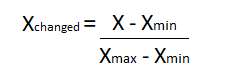

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
#Normalizing the X features
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = scaler.fit_transform(X)

In [17]:
results_knn_norm = []

In [21]:
#The result
print(rescaledX)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [22]:
#For the K-NN we had an improvement in the result of almost 2% 
knn_norm = KNeighborsClassifier()
scoresknn_norm = cross_val_score(knn_norm, rescaledX, y, cv = kfold)
results_knn_norm.append(scoresknn_norm.mean())
print(f'Accuracy: {scoresknn_norm.mean()*100:.3f}%')

Accuracy: 73.570%


### Now we will aplly the same algorithms but with the Standarization or Z-score (StandarScaler).
#### With this algorithm the variables will result in a mean equal to 0 and a standard deviation equal to 1.
#### Standardization may be better in cases where the data follow a Gaussian distribution.
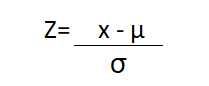

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
#Applying the z-score
standardscaler = StandardScaler().fit(X)
standX = standardscaler.transform(X)

In [25]:
results_knn_stand = []

In [26]:
#The result
print(standX)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [27]:
#Creating the model
knn_stand = KNeighborsClassifier()
scoresknn_stand = cross_val_score(knn_stand, standX, y, cv = kfold)

In [28]:
#Seeing the results
results_knn_stand.append(scoresknn_stand.mean())
print(f'Accuracy: {scoresknn_stand.mean()*100:.3f}%')

Accuracy: 73.956%


#### So for this case the k-nn algorithm got better performance with the z-score standardscaler but the ideal is that we do tests with both functions for each dataset or algorithm that we are going to apply.

---



In [29]:
print(f'Accuracy without normalization:{scoresknn.mean()*100:.3f}%')
print(f'Accuracy with MixMaxScaler normalization:{scoresknn_norm.mean()*100:.3f}%')
print(f'Accuracy With StandarScaler standarization:{scoresknn_stand.mean()*100:.3f}%')

Accuracy without normalization:71.625%
Accuracy with MixMaxScaler normalization:73.570%
Accuracy With StandarScaler standarization:73.956%
